In [1]:
from collections import Counter
from glob import glob 
from utils.cleaner import cleanTexts
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from glob import glob 


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marnugue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/marnugue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
path =  "data/dataset"
data = cleanTexts(path,lematizer = False,stopword=True,steaming = False,extractor=False)
file_pi = open('dataCleaned.obj', 'wb') 
pickle.dump(data, file_pi)

In [16]:
filehandler = open("dataCleaned.obj", 'rb') 
data = pickle.load(filehandler)
df = pd.DataFrame({},columns=["text","class","name"])
for i in range(len(data)):
        df = df.append(pd.DataFrame(data[i], columns=df.columns),ignore_index=True)

In [17]:
texts = df[df["class"]==3]["text"].to_numpy().flatten()
textClass = ""
for elem in texts:
    textClass+=elem
textClass = textClass.split(" ")

In [18]:
from collections import Counter


 # equals to list(set(words))
 #
dfFiltered = pd.DataFrame({},columns=["word","count"])
dfFiltered["word"] = list(Counter(textClass).keys())
dfFiltered["count"] = list(Counter(textClass).values())
dataFiltered = dfFiltered.sort_values(by="count",ascending=False).head(5)

Text(0.5, 1.0, 'Frecuencia de palabras Politica')

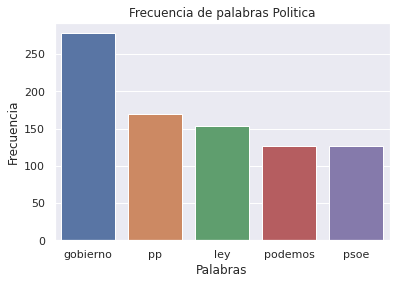

In [19]:
sns.set(font_scale=1) 
ax = sns.barplot(x="word", y="count", data=dataFiltered)
ax.set(xlabel='Palabras', ylabel='Frecuencia')
ax.set_title("Frecuencia de palabras Politica")
# ax.figure.savefig('PalabrasSinStopWordsPolitica.png',dpi=600)

## Ordenamiento de los documentos mas representativos de una temática

In [11]:
df = pd.read_csv("modelResults.csv")
df.sort_values(["class1","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
0,0,bayes,1.0,6.088001e-50,8.796103e-27,1,D66.txt
3,3,bayes,1.0,7.722765e-31,5.142041e-40,1,D48.txt
6,6,bayes,1.0,6.083222e-28,5.739626e-47,1,D61.txt
9,9,bayes,1.0,5.388945e-27,2.259277e-34,1,D26.txt
12,12,bayes,1.0,2.542824e-42,4.572373e-39,1,D80.txt


In [12]:
df.sort_values(["class2","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
1,1,bayes,1.059523e-64,1.0,1.917063e-76,2,S31.txt
4,4,bayes,6.692604e-51,1.0,9.169084e-63,2,S55.txt
7,7,bayes,1.721225e-37,1.0,1.484861e-49,2,S35.txt
10,10,bayes,6.881166e-34,1.0,2.932447e-52,2,S16.txt
13,13,bayes,1.121237e-66,1.0,2.606424e-80,2,S11.txt


In [13]:
df.sort_values(["class3","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
2,2,bayes,2.296945e-30,1.870600e-42,1.0,3,P67.txt
5,5,bayes,1.507049e-15,4.501099e-19,1.0,3,P71.txt
8,8,bayes,9.586798e-36,1.863205e-58,1.0,3,P55.txt
11,11,bayes,1.231509e-26,1.796125e-39,1.0,3,P72.txt
14,14,bayes,1.648927e-35,1.792773e-28,1.0,3,P47.txt


Veamos ahora con regresion

In [20]:
df = df[df["method"]=="regresion"]
df.sort_values(["class1","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
171,171,regresion,0.721316,0.128098,0.150585,1,D75.txt
177,177,regresion,0.689538,0.147016,0.163447,1,D89.txt
135,135,regresion,0.682303,0.130741,0.186956,1,D52.txt
168,168,regresion,0.675979,0.160823,0.163199,1,D27.txt
144,144,regresion,0.672758,0.169878,0.157364,1,D14.txt


In [21]:
df.sort_values(["class2","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
175,175,regresion,0.112882,0.780461,0.106658,2,S79.txt
166,166,regresion,0.141771,0.733694,0.124536,2,S6.txt
112,112,regresion,0.141079,0.730809,0.128113,2,S44.txt
91,91,regresion,0.133392,0.723639,0.142969,2,S31.txt
148,148,regresion,0.139086,0.722162,0.138751,2,S20.txt


In [22]:
df.sort_values(["class3","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
110,110,regresion,0.093871,0.102763,0.803365,3,P27.txt
173,173,regresion,0.116821,0.084188,0.798990,3,P25.txt
179,179,regresion,0.117770,0.093913,0.788318,3,P78.txt
107,107,regresion,0.119530,0.095578,0.784892,3,P30.txt
152,152,regresion,0.115721,0.100613,0.783666,3,P2.txt


In [7]:
from nltk.corpus import stopwords
stopwords.words("spanish")

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'